In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_parquet("output/Electronics_top5_monthly_topics")

In [9]:
df.head(20)

,review_month,primary_topic,count,monthly_total,percentage,topic,terms,rank
0,1,0.0,7044,46140,15.266580,0,"[great, works, good, price, well, product, cab...",1
1,1,6.0,6774,46140,14.681404,6,"[sound, great, good, quality, headphones, use,...",2
2,1,5.0,6070,46140,13.155613,5,"[great, product, easy, good, works, use, one, ...",3
3,1,8.0,5570,46140,12.071955,8,"[lens, camera, great, good, use, bag, case, qu...",4
4,1,3.0,5407,46140,11.718682,3,"[one, usb, product, work, printer, use, new, c...",5
5,2,0.0,5433,34417,15.785804,0,"[great, works, good, price, well, product, cab...",1
6,2,6.0,5083,34417,14.768864,6,"[sound, great, good, quality, headphones, use,...",2
7,2,3.0,4258,34417,12.371793,3,"[one, usb, product, work, printer, use, new, c...",3
8,2,5.0,4074,34417,11.837173,5,"[great, product, easy, good, works, use, one, ...",4
9,2,8.0,3981,34417,11.566958,8,"[lens, camera, great, good, use, bag, case, qu...",5


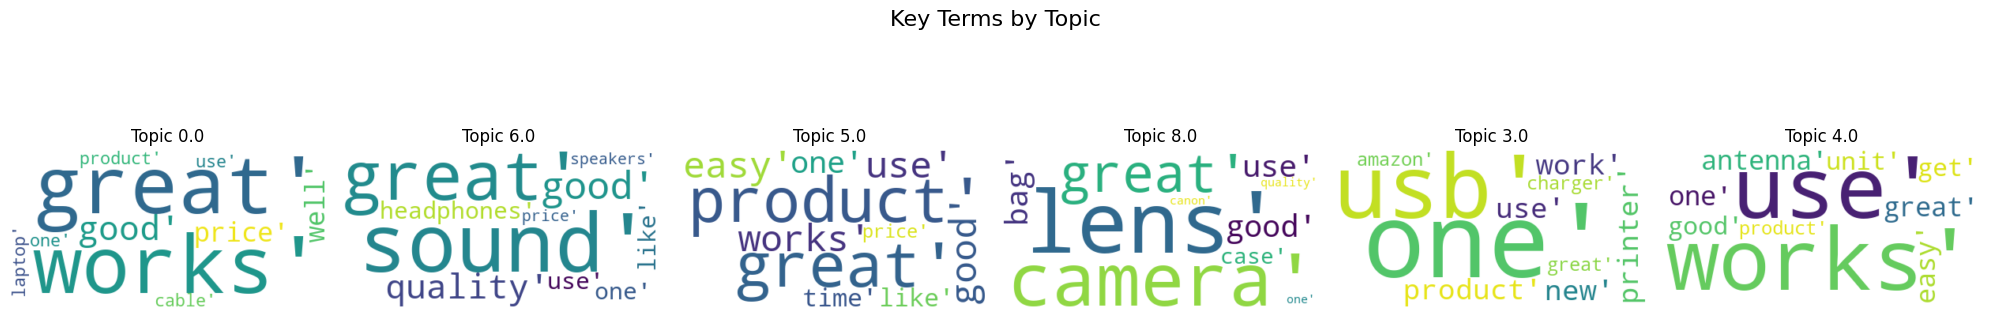

In [23]:
# Create a word cloud for each topic
unique_topics = df['primary_topic'].unique()

fig, axes = plt.subplots(1, len(unique_topics), figsize=(20, 4))
fig.suptitle('Key Terms by Topic', fontsize=16)

for i, topic_id in enumerate(unique_topics):
    topic_row = df[df['primary_topic'] == topic_id].iloc[0]
    terms = topic_row['terms']
    
    # Convert to string if it's bytes
    if isinstance(terms, bytes):
        terms = terms.decode('utf-8')
    # If terms is a list or other structure, convert to string
    elif not isinstance(terms, str):
        terms = str(terms)
        
    # Create a word cloud from the terms
    wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=20).generate(terms)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Topic {topic_id}')
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

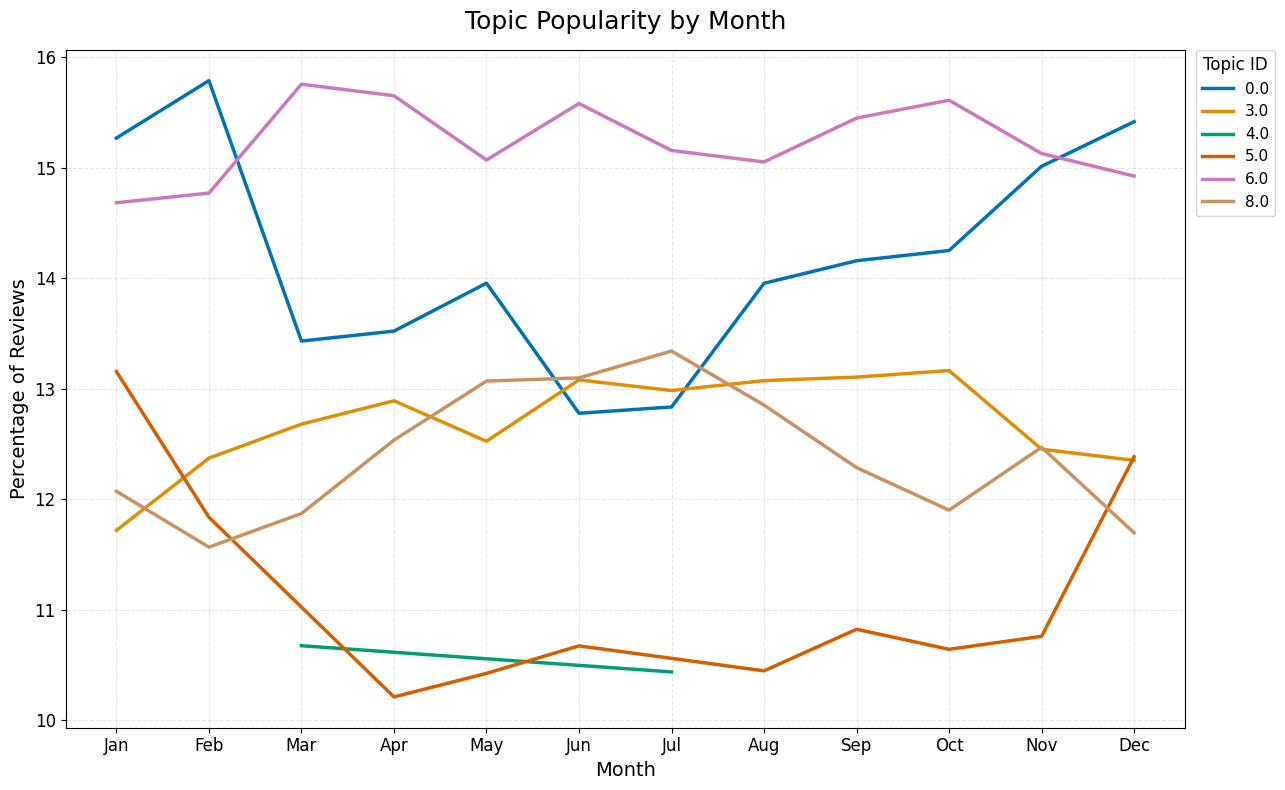

In [24]:
plt.figure(figsize=(14, 8))
colors = sns.color_palette("colorblind", len(df['primary_topic'].unique()))

ax = sns.lineplot(
    data=df, 
    x='review_month', 
    y='percentage', 
    hue='primary_topic',
    palette=colors,
    markers=True, 
    markersize=10,
    linewidth=2.5
)

plt.title('Topic Popularity by Month', fontsize=18, pad=15)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, alpha=0.3, linestyle='--')

# move legend outside plot
plt.legend(
    title='Topic ID',
    title_fontsize=12,
    fontsize=11,
    loc='upper left', 
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0
)
plt.tight_layout()
plt.subplots_adjust(right=0.85) 

plt.savefig('topic_popularity_by_month.png', dpi=300, bbox_inches='tight')
plt.show()